In [125]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.dates as mdates
import seaborn as sn
from datetime import datetime
import scipy.stats as stats
import statsmodels.formula.api as smf
from sklearn.model_selection import train_test_split
from dmba import regressionSummary
from sklearn.linear_model import LinearRegression

In [126]:
df = pd.read_csv('NewInterestRateData.csv')
df

,Year,FFR,APR,PrimeCreditRate,Mortgage Rates,SPX,BUSE,THFF,ASB,HTLF,...,EWBC IOD,WBS IOD,BUSE Loan Default,THFF Loan Default,ASB Loan Default,HTLF Loan Default,CFR Loan Default,CBSH Loan Default,EWBC Loan Default,WBS Loan Default
0,2006,4.956154,7.950577,5.950577,6.413269,1311.401731,63.973269,30.878462,32.945962,25.064231,...,200.3,310.2,1.3,7.0,19.1,3.9,14.2,25.6,6.2,11.0
1,2007,5.035000,8.062500,5.881154,6.337308,1477.214038,63.519808,30.014423,31.146731,23.156346,...,241.0,361.3,14.5,6.6,34.5,10.1,14.7,42.7,12.0,67.8
2,2008,1.986154,5.151346,2.456923,6.045000,1220.802500,52.592308,34.756154,22.539615,20.890385,...,178.1,250.2,98.3,7.9,202.1,29.3,37.8,108.9,226.0,186.3
3,2009,0.159231,3.250000,0.500000,5.036538,950.129808,20.087308,32.650000,13.016346,14.280192,...,129.5,180.8,251.5,11.9,750.6,39.4,65.4,160.7,528.7,303.0
4,2010,0.175769,3.250000,0.715577,4.689808,1139.362885,13.287500,29.145962,13.364231,16.219423,...,116.7,112.6,42.0,9.2,390.0,32.5,43.6,100.0,200.2,115.0
5,2011,0.102692,3.250000,0.750000,4.447885,1268.168846,14.931346,31.574808,12.664231,15.278462,...,107.1,80.8,20.0,5.8,52.0,29.4,27.4,51.5,95.0,22.5
6,2012,0.139423,3.250000,0.750000,3.657500,1380.160000,14.327308,30.725192,12.980385,22.010000,...,75.9,59.6,16.5,8.8,10.1,8.2,10.1,27.3,65.2,21.5
7,2013,0.109423,3.250000,0.750000,3.975577,1645.530962,14.617500,31.993269,15.632692,26.829038,...,63.5,46.6,7.5,7.9,10.1,9.7,20.6,20.4,22.4,33.5
8,2014,0.087885,3.250000,0.750000,4.174615,1931.211538,17.508462,32.782115,17.730000,25.252885,...,65.5,44.2,2.0,5.1,16.0,14.5,16.3,29.5,49.2,37.3
9,2015,0.133269,3.259615,0.759615,3.850577,2060.633269,19.720577,34.307692,18.981538,34.288077,...,73.5,46.0,1.6,4.7,37.5,12.7,51.8,28.7,14.2,49.3


In [127]:
df[["FFR","APR","PrimeCreditRate","SPX","BUSE","THFF","ASB","HTLF","CFR","CBSH","EWBC", "WBS", "BUSE NII","THFF NII", "ASB NII","HTLF NII", "CFR NII", "CBSH NII", "EWBC NII", "WBS NII","BUSE IOD", "THFF IOD", "ASB IOD","HTLF IOD", "CFR IOD", "CBSH IOD", "EWBC IOD", "WBS IOD","BUSE Loan Default", "THFF Loan Default", "ASB Loan Default","HTLF Loan Default", "CFR Loan Default", "CBSH Loan Default", "EWBC Loan Default", "WBS Loan Default"]]
df.corr()

,Year,FFR,APR,PrimeCreditRate,Mortgage Rates,SPX,BUSE,THFF,ASB,HTLF,...,EWBC IOD,WBS IOD,BUSE Loan Default,THFF Loan Default,ASB Loan Default,HTLF Loan Default,CFR Loan Default,CBSH Loan Default,EWBC Loan Default,WBS Loan Default
Year,1.000000,-0.118544,-0.101950,-0.199202,-0.380108,0.929650,-0.465744,0.752185,-0.132059,0.796571,...,0.417859,0.018238,-0.366669,-0.452192,-0.302624,0.094009,0.178001,-0.144174,-0.196169,0.111029
FFR,-0.118544,1.000000,0.999660,0.992849,0.817924,0.136227,0.754939,-0.015626,0.740973,0.070893,...,0.654998,0.819552,-0.196136,-0.013496,-0.235290,-0.338397,-0.204135,-0.223167,-0.212893,0.017322
APR,-0.101950,0.999660,1.000000,0.990305,0.817558,0.153119,0.747866,-0.007750,0.734425,0.077577,...,0.667920,0.827026,-0.199768,-0.019789,-0.240483,-0.334506,-0.200550,-0.222721,-0.213192,0.025521
PrimeCreditRate,-0.199202,0.992849,0.990305,1.000000,0.808106,0.046685,0.783020,-0.069518,0.764243,0.028036,...,0.587887,0.773414,-0.220694,-0.010273,-0.265546,-0.379441,-0.228431,-0.267025,-0.254701,-0.064277
Mortgage Rates,-0.380108,0.817924,0.817558,0.808106,1.000000,-0.159921,0.644187,-0.236839,0.485220,-0.301499,...,0.543854,0.811517,0.146340,0.176048,0.107660,-0.241157,-0.307699,-0.026352,0.113961,0.342089
SPX,0.929650,0.136227,0.153119,0.046685,-0.159921,1.000000,-0.183363,0.726692,0.120578,0.795334,...,0.501142,0.197841,-0.382593,-0.505212,-0.329815,0.012792,0.079254,-0.154863,-0.250799,0.161554
BUSE,-0.465744,0.754939,0.747866,0.783020,0.644187,-0.183363,1.000000,-0.067580,0.879668,-0.032018,...,0.066950,0.378299,-0.023594,-0.049695,-0.155623,-0.252793,-0.187223,-0.070730,-0.173874,-0.046720
THFF,0.752185,-0.015626,-0.007750,-0.069518,-0.236839,0.726692,-0.067580,1.000000,0.274022,0.924350,...,0.172445,-0.123085,-0.233785,-0.577762,-0.280908,-0.030185,-0.062335,-0.142205,-0.177989,0.104327
ASB,-0.132059,0.740973,0.734425,0.764243,0.485220,0.120578,0.879668,0.274022,1.000000,0.370097,...,0.123896,0.291302,-0.324082,-0.373866,-0.412966,-0.440172,-0.306415,-0.358546,-0.453383,-0.204978
HTLF,0.796571,0.070893,0.077577,0.028036,-0.301499,0.795334,-0.032018,0.924350,0.370097,1.000000,...,0.198373,-0.111448,-0.461742,-0.610666,-0.474199,-0.123056,-0.017898,-0.304138,-0.404242,-0.114582


In [128]:
plt.rcParams['figure.figsize']= 16,8
df.head(2)

,Year,FFR,APR,PrimeCreditRate,Mortgage Rates,SPX,BUSE,THFF,ASB,HTLF,...,EWBC IOD,WBS IOD,BUSE Loan Default,THFF Loan Default,ASB Loan Default,HTLF Loan Default,CFR Loan Default,CBSH Loan Default,EWBC Loan Default,WBS Loan Default
0,2006,4.956154,7.950577,5.950577,6.413269,1311.401731,63.973269,30.878462,32.945962,25.064231,...,200.3,310.2,1.3,7.0,19.1,3.9,14.2,25.6,6.2,11.0
1,2007,5.035000,8.062500,5.881154,6.337308,1477.214038,63.519808,30.014423,31.146731,23.156346,...,241.0,361.3,14.5,6.6,34.5,10.1,14.7,42.7,12.0,67.8


In [129]:
df.tail()
df1 = df[["Year", 'FFR','SPX','BUSE','THFF','ASB','HTLF','Mortgage Rates', "CFR", "CBSH", "EWBC", "WBS"]]

In [130]:
df1.tail(2)

,Year,FFR,SPX,BUSE,THFF,ASB,HTLF,Mortgage Rates,CFR,CBSH,EWBC,WBS
16,2022,1.661731,4090.466923,24.837692,45.643269,21.906154,46.459423,5.344038,135.02,66.44,73.44,50.75
17,2023,4.901579,4228.335526,21.146842,37.683158,18.690789,36.145789,6.623421,105.94,53.07,58.53,42.15


In [131]:
df1.index
df1.isnull().sum()/df1.shape[0]

Year              0.0
FFR               0.0
SPX               0.0
BUSE              0.0
THFF              0.0
ASB               0.0
HTLF              0.0
Mortgage Rates    0.0
CFR               0.0
CBSH              0.0
EWBC              0.0
WBS               0.0
dtype: float64

In [132]:
df.corr()

,Year,FFR,APR,PrimeCreditRate,Mortgage Rates,SPX,BUSE,THFF,ASB,HTLF,...,EWBC IOD,WBS IOD,BUSE Loan Default,THFF Loan Default,ASB Loan Default,HTLF Loan Default,CFR Loan Default,CBSH Loan Default,EWBC Loan Default,WBS Loan Default
Year,1.000000,-0.118544,-0.101950,-0.199202,-0.380108,0.929650,-0.465744,0.752185,-0.132059,0.796571,...,0.417859,0.018238,-0.366669,-0.452192,-0.302624,0.094009,0.178001,-0.144174,-0.196169,0.111029
FFR,-0.118544,1.000000,0.999660,0.992849,0.817924,0.136227,0.754939,-0.015626,0.740973,0.070893,...,0.654998,0.819552,-0.196136,-0.013496,-0.235290,-0.338397,-0.204135,-0.223167,-0.212893,0.017322
APR,-0.101950,0.999660,1.000000,0.990305,0.817558,0.153119,0.747866,-0.007750,0.734425,0.077577,...,0.667920,0.827026,-0.199768,-0.019789,-0.240483,-0.334506,-0.200550,-0.222721,-0.213192,0.025521
PrimeCreditRate,-0.199202,0.992849,0.990305,1.000000,0.808106,0.046685,0.783020,-0.069518,0.764243,0.028036,...,0.587887,0.773414,-0.220694,-0.010273,-0.265546,-0.379441,-0.228431,-0.267025,-0.254701,-0.064277
Mortgage Rates,-0.380108,0.817924,0.817558,0.808106,1.000000,-0.159921,0.644187,-0.236839,0.485220,-0.301499,...,0.543854,0.811517,0.146340,0.176048,0.107660,-0.241157,-0.307699,-0.026352,0.113961,0.342089
SPX,0.929650,0.136227,0.153119,0.046685,-0.159921,1.000000,-0.183363,0.726692,0.120578,0.795334,...,0.501142,0.197841,-0.382593,-0.505212,-0.329815,0.012792,0.079254,-0.154863,-0.250799,0.161554
BUSE,-0.465744,0.754939,0.747866,0.783020,0.644187,-0.183363,1.000000,-0.067580,0.879668,-0.032018,...,0.066950,0.378299,-0.023594,-0.049695,-0.155623,-0.252793,-0.187223,-0.070730,-0.173874,-0.046720
THFF,0.752185,-0.015626,-0.007750,-0.069518,-0.236839,0.726692,-0.067580,1.000000,0.274022,0.924350,...,0.172445,-0.123085,-0.233785,-0.577762,-0.280908,-0.030185,-0.062335,-0.142205,-0.177989,0.104327
ASB,-0.132059,0.740973,0.734425,0.764243,0.485220,0.120578,0.879668,0.274022,1.000000,0.370097,...,0.123896,0.291302,-0.324082,-0.373866,-0.412966,-0.440172,-0.306415,-0.358546,-0.453383,-0.204978
HTLF,0.796571,0.070893,0.077577,0.028036,-0.301499,0.795334,-0.032018,0.924350,0.370097,1.000000,...,0.198373,-0.111448,-0.461742,-0.610666,-0.474199,-0.123056,-0.017898,-0.304138,-0.404242,-0.114582


In [133]:
xticks= pd.date_range('2006-01-04', periods = 17, freq='1Y')
xlabels=np.arange(2006,2023)
print(xticks)
print(xlabels)

DatetimeIndex(['2006-12-31', '2007-12-31', '2008-12-31', '2009-12-31',
               '2010-12-31', '2011-12-31', '2012-12-31', '2013-12-31',
               '2014-12-31', '2015-12-31', '2016-12-31', '2017-12-31',
               '2018-12-31', '2019-12-31', '2020-12-31', '2021-12-31',
               '2022-12-31'],
              dtype='datetime64[ns]', freq='A-DEC')
[2006 2007 2008 2009 2010 2011 2012 2013 2014 2015 2016 2017 2018 2019
 2020 2021 2022]


In [134]:
def NormalizeData(data):
    return (data - np.min(data)) / (np.max(data) - np.min(data))

Text(0, 0.5, 'Standardized Rate')

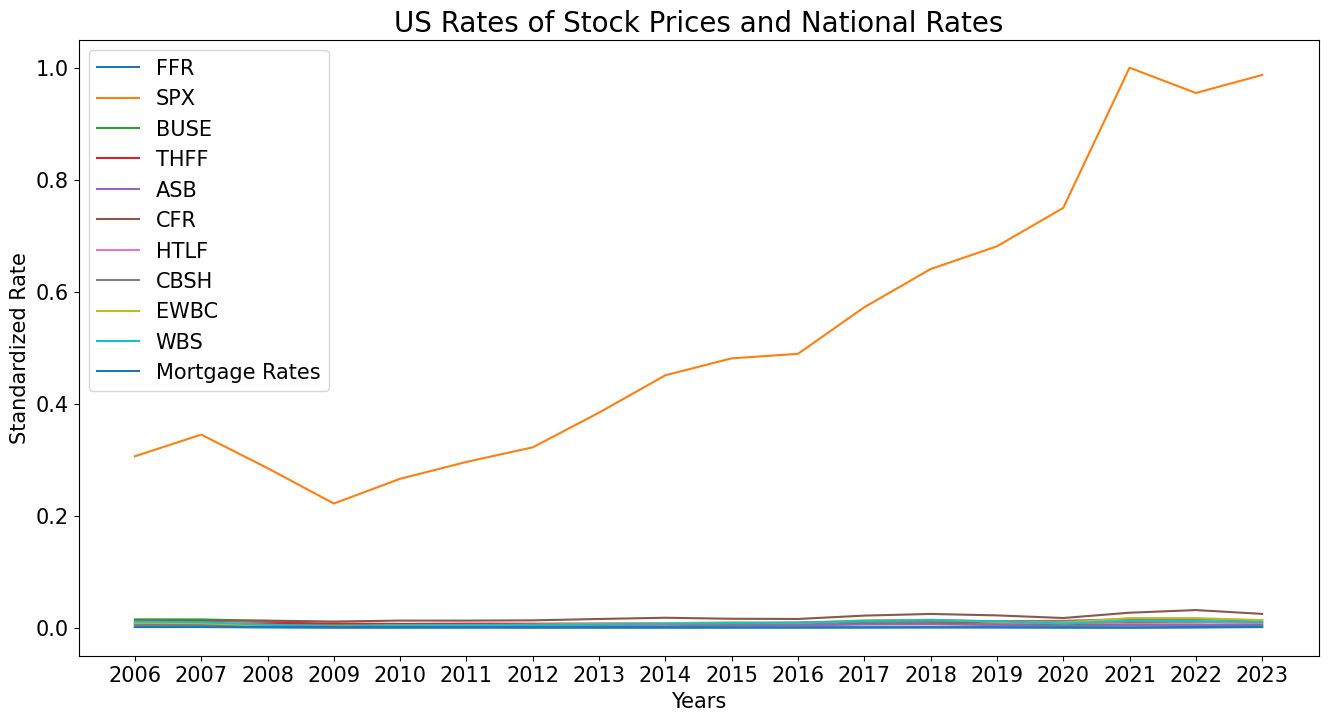

In [135]:
#Code worked in Google Colab but isn't working here
df_norm = (df1-np.min(df1))/(np.max(df1)-np.min(df1)) # We scaled Using the Min-Max Normalization and Standardization
#In essense, this code is standardizing each value to be within a 0 to 1 scale using the mins and maxes of the columns
df_norm.head()
labels = ["2006", "2007", "2008", "2009", "2010", "2011", "2012", "2013", "2014", "2015", "2016", "2017", "2018", "2019", "2020", "2021", "2022", "2023"]

plt.plot(labels, df_norm[['FFR','SPX','BUSE','THFF','ASB','CFR','HTLF', "CBSH", "EWBC", "WBS", 'Mortgage Rates']])
plt.yticks(fontsize=15)
plt.legend(['FFR','SPX','BUSE','THFF','ASB','CFR','HTLF', "CBSH", "EWBC", "WBS", 'Mortgage Rates'], fontsize=15)
x1 = [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18]
plt.xticks( fontsize=15)
#plt.xticks(ticks=xticks, labels=xlabels,fontsize=15)
plt.title('US Rates of Stock Prices and National Rates',fontsize= 20)
plt.xlabel("Years", fontsize = 15)
plt.ylabel("Standardized Rate", fontsize = 15)

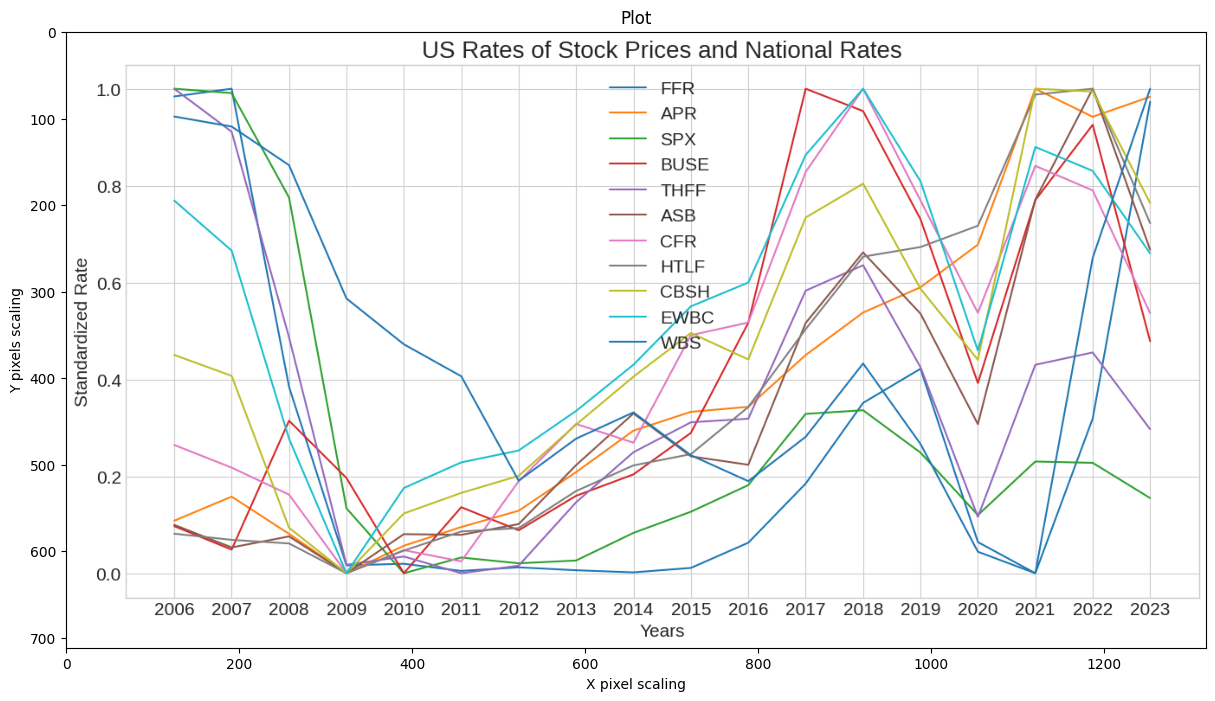

In [136]:
from matplotlib import pyplot as plt
from matplotlib import image as mpimg
 
plt.title("Plot")
plt.xlabel("X pixel scaling")
plt.ylabel("Y pixels scaling")
 
image = mpimg.imread("image.png")
plt.imshow(image)
plt.show()


Machine Learning

In [141]:
X = df.drop(columns=["Year","APR","SPX","BUSE","THFF","ASB","HTLF","CFR","CBSH","EWBC", "WBS", "THFF NII", "ASB NII","HTLF NII", "CFR NII", "CBSH NII", "EWBC NII", "WBS NII", "THFF IOD", "ASB IOD","HTLF IOD", "CFR IOD", "CBSH IOD", "EWBC IOD", "WBS IOD","BUSE Loan Default", "THFF Loan Default", "ASB Loan Default","HTLF Loan Default", "CFR Loan Default", "CBSH Loan Default", "EWBC Loan Default", "WBS Loan Default"])
y = df["BUSE Loan Default"]

In [142]:
X = pd.get_dummies(X, drop_first=True)
train_X, test_X, train_y, test_y = train_test_split(X, y, test_size=0.2, random_state=77)
model = LinearRegression()
model.fit(train_X, train_y)
train_predictions = model.predict(train_X)
test_predictions = model.predict(test_X)
print("Model Performance on the Training Data")
print()
print()
regressionSummary(train_y, train_predictions)

Model Performance on the Training Data



Regression statistics

                      Mean Error (ME) : 0.0000
       Root Mean Squared Error (RMSE) : 31.0680
            Mean Absolute Error (MAE) : 19.8271
          Mean Percentage Error (MPE) : 89.8175
Mean Absolute Percentage Error (MAPE) : 178.4122


In [143]:
print("Model Performance on the Testing Data")
print()
print()

regressionSummary(test_y, test_predictions)

Model Performance on the Testing Data



Regression statistics

                      Mean Error (ME) : -28.5500
       Root Mean Squared Error (RMSE) : 52.8493
            Mean Absolute Error (MAE) : 41.0532
          Mean Percentage Error (MPE) : -814.0996
Mean Absolute Percentage Error (MAPE) : 1008.3673


In [144]:
predictions = model.predict(test_X)
print(predictions)
print(test_y)

[  3.36196926  95.96794781  60.53854482 -12.36826977]
13    10.4
17     2.8
1     14.5
10     5.6
Name: BUSE Loan Default, dtype: float64


THFF Predictions

In [147]:
X = df.drop(columns=["Year","FFR","APR","PrimeCreditRate","SPX","BUSE","THFF","ASB","HTLF","CFR","CBSH","EWBC", "WBS","BUSE NII","THFF NII","ASB NII","HTLF NII", "CFR NII", "CBSH NII", "EWBC NII", "WBS NII","BUSE IOD", "ASB IOD","HTLF IOD", "CFR IOD", "CBSH IOD", "EWBC IOD", "WBS IOD","BUSE Loan Default", "THFF Loan Default", "ASB Loan Default","HTLF Loan Default", "CFR Loan Default", "CBSH Loan Default", "EWBC Loan Default", "WBS Loan Default"])
y = df["THFF Loan Default"]

In [148]:
X = pd.get_dummies(X, drop_first=True)
train_X, test_X, train_y, test_y = train_test_split(X, y, test_size=0.2, random_state=100)
model = LinearRegression()
model.fit(train_X, train_y)
predictions = model.predict(test_X)
print(predictions)
print(test_y)

[6.3402788  6.44696803 6.73243457 7.21886255]
9     4.7
11    5.3
16    2.0
13    4.7
Name: THFF Loan Default, dtype: float64


ASB Predictions, Using Negative Correlations

In [160]:
X = df.drop(columns=["Year","SPX","BUSE","THFF","HTLF","CFR","CBSH","EWBC", "WBS","BUSE NII","THFF NII","ASB NII","HTLF NII", "CFR NII", "CBSH NII", "EWBC NII", "WBS NII","BUSE IOD","THFF IOD","ASB IOD", "HTLF IOD", "CFR IOD", "CBSH IOD", "EWBC IOD", "WBS IOD","BUSE Loan Default", "THFF Loan Default", "ASB Loan Default","HTLF Loan Default", "CFR Loan Default", "CBSH Loan Default", "EWBC Loan Default", "WBS Loan Default"])
y = df["ASB Loan Default"]

In [161]:
X = pd.get_dummies(X, drop_first=True)
train_X, test_X, train_y, test_y = train_test_split(X, y, test_size=0.2, random_state=100)
model = LinearRegression()
model.fit(train_X, train_y)
predictions = model.predict(test_X)
print(predictions)
print(test_y)

[  56.30524882   84.27577206  345.02146018 -193.33473118]
9     37.5
11    26.0
16    33.0
13    16.0
Name: ASB Loan Default, dtype: float64


HTLF Predictions(Using Negative Correlations)

In [164]:
X = df.drop(columns=["Year", "SPX","BUSE","THFF","ASB","HTLF","CFR","CBSH","EWBC", "WBS","BUSE NII","HTLF NII","THFF NII","ASB NII","CFR NII", "CBSH NII", "EWBC NII", "WBS NII","BUSE IOD","THFF IOD","HTLF IOD","ASB IOD", "CFR IOD", "CBSH IOD", "EWBC IOD", "WBS IOD","BUSE Loan Default", "THFF Loan Default", "ASB Loan Default","HTLF Loan Default", "CFR Loan Default", "CBSH Loan Default", "EWBC Loan Default", "WBS Loan Default"])
y = df["HTLF Loan Default"]

In [165]:
X = pd.get_dummies(X, drop_first=True)
train_X, test_X, train_y, test_y = train_test_split(X, y, test_size=0.2, random_state=100)
model = LinearRegression()
model.fit(train_X, train_y)
predictions = model.predict(test_X)
print(predictions)
print(test_y)

[21.04755153 21.68135506 34.20756435 13.84614084]
9     12.7
11    15.6
16    15.4
13    16.7
Name: HTLF Loan Default, dtype: float64
